In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [118]:
df = pd.read_excel('stores_sales_forecasting.xlsx', sheet_name="sheet1")
#df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'], inplace=True)
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2111,9932,CA-2015-104948,11/13/2015,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,6.833320e+05,4,0.010417,-40196.0
2112,9938,CA-2016-164889,2016-03-06 00:00:00,2016-06-06 00:00:00,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,7.108800e+04,2,0.001389,-17772.0
2113,9939,CA-2016-169824,2016-12-12 00:00:00,12/17/2016,Standard Class,NS-18640,Noel Staavos,Corporate,United States,New York City,...,10009,East,FUR-FU-10004864,Furniture,Furnishings,Eldon 500 Class Desk Accessories,2.524306e+00,5,0.000000,199155.0
2114,9948,CA-2017-121559,2017-01-06 00:00:00,2017-03-06 00:00:00,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,46203,Central,FUR-CH-10003746,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1.925880e+03,6,0.000000,5392464.0
2115,9956,CA-2015-141593,12/14/2015,12/16/2015,Second Class,DB-12970,Darren Budd,Corporate,United States,Los Angeles,...,90045,West,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",2.735680e+05,2,0.001389,102588.0
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,3.834656e+06,4,0.022222,-676704.0
2117,9965,CA-2016-146374,2016-05-12 00:00:00,2016-10-12 00:00:00,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,5.444444e-01,1,0.000000,6432.0
2118,9981,US-2015-151435,2015-06-09 00:00:00,2015-09-09 00:00:00,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,8.598000e+01,1,0.000000,223548.0
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,2.524800e+04,3,0.001389,41028.0
2120,9991,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,9.196000e+01,2,0.000000,156332.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [120]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [121]:
sales_columns = df.select_dtypes(include=[np.number]).columns.tolist()
sales_columns.remove('Row ID')
sales_columns.remove('Postal Code')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [122]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [123]:
# Statistical Summary
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2.121000e+03,2121.000000,2121.000000,2.121000e+03
mean,5041.643564,55726.556341,2.447197e+05,3.785007,0.001838,2.769394e+04
std,2885.740258,32261.888225,9.333188e+05,2.251620,0.003681,1.092075e+06
min,1.000000,1040.000000,1.465278e-01,1.000000,0.000000,-1.862312e+07
25%,2568.000000,22801.000000,2.475000e+01,2.000000,0.000000,-4.384800e+04
50%,5145.000000,60505.000000,1.212960e+03,3.000000,0.001389,2.956800e+04
75%,7534.000000,90032.000000,2.056660e+05,5.000000,0.002083,1.535220e+05
max,9991.000000,99301.000000,2.396266e+07,14.000000,0.031250,7.464078e+06


In [124]:
pd.DataFrame(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr())

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.141780,0.531656,-0.200988
Quantity,0.141780,1.000000,0.003833,0.049664
Discount,0.531656,0.003833,1.000000,-0.233234
Profit,-0.200988,0.049664,-0.233234,1.000000


In [125]:
pd.DataFrame(df[['Sales', 'Quantity', 'Discount', 'Profit']].value_counts().tail(10))

0
Sales       Quantity Discount Profit        
173.94      3        0.000000  139152.00   1
171.96      2        0.000000  447096.00   1
170.98      1        0.000000  324862.00   1
167.84      8        0.000000  117488.00   1
163.88      4        0.003472 -81.94       1
            2        0.000000  40.97       1
161.96      2        0.000000  453488.00   1
160.98      1        0.000000  209274.00   1
159.92      4        0.000000  31984.00    1
23962656.00 4        0.022222 -3171528.00  1

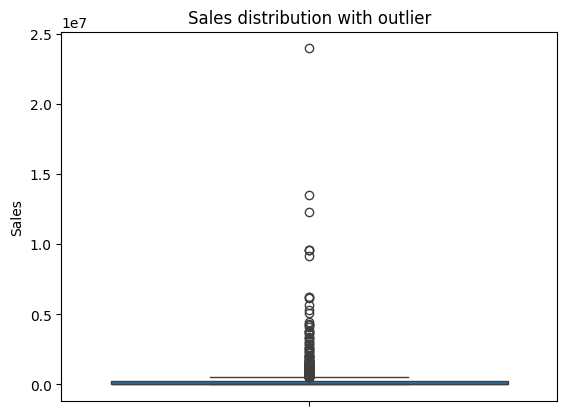

In [126]:
# checking data outlier


sns.boxplot(df['Sales'])
plt.title('Sales distribution with outlier')
plt.show()

Handling outlier

In [127]:
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# delete rows with outlier
df['Sales'] = np.clip(df['Sales'], lower_bound, upper_bound)

Data Visualitation

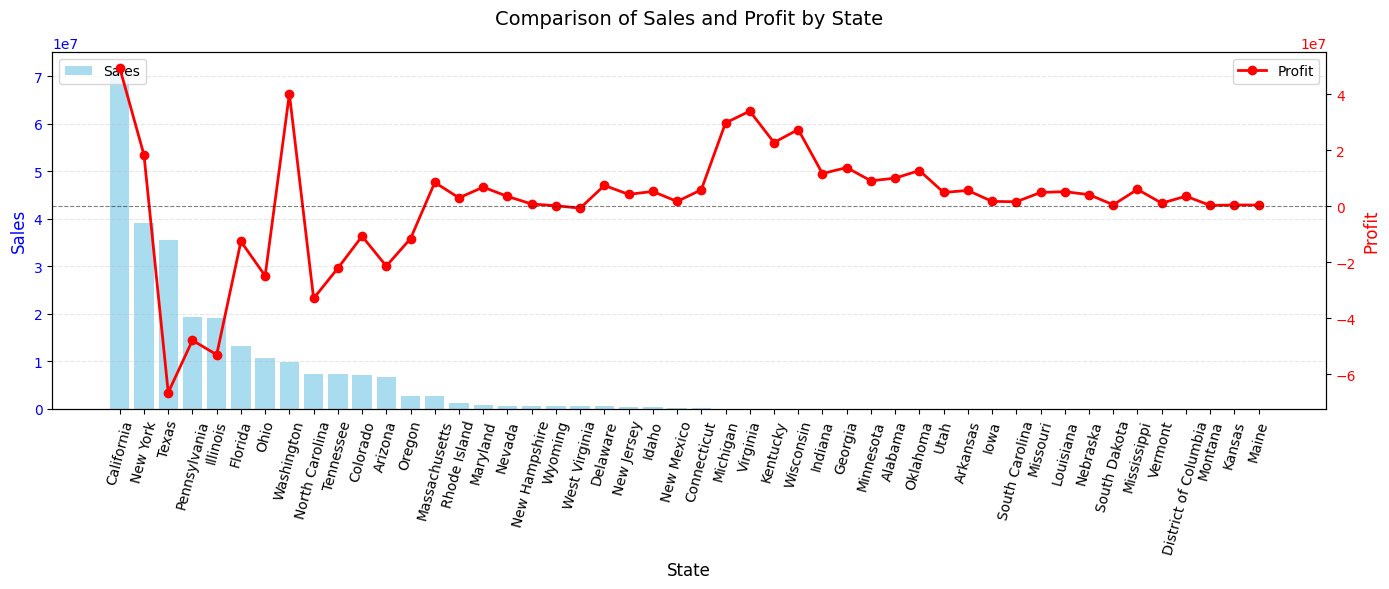

In [128]:
# aggregation data
state_sales = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Plot dengan dual Y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Axis kiri untuk Sales (bar chart)
ax1.bar(state_sales['State'], state_sales['Sales'], color='skyblue', alpha=0.7, label='Sales')
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Sales', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=75)

# Axis kanan untuk Profit (line chart)
ax2 = ax1.twinx()
ax2.plot(state_sales['State'], state_sales['Profit'], color='red', marker='o', linewidth=2, label='Profit')
ax2.set_ylabel('Profit', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)  # zero line for profit

# Title dan legend
plt.title('Comparison of Sales and Profit by State', fontsize=14, fontweight='regular', pad=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

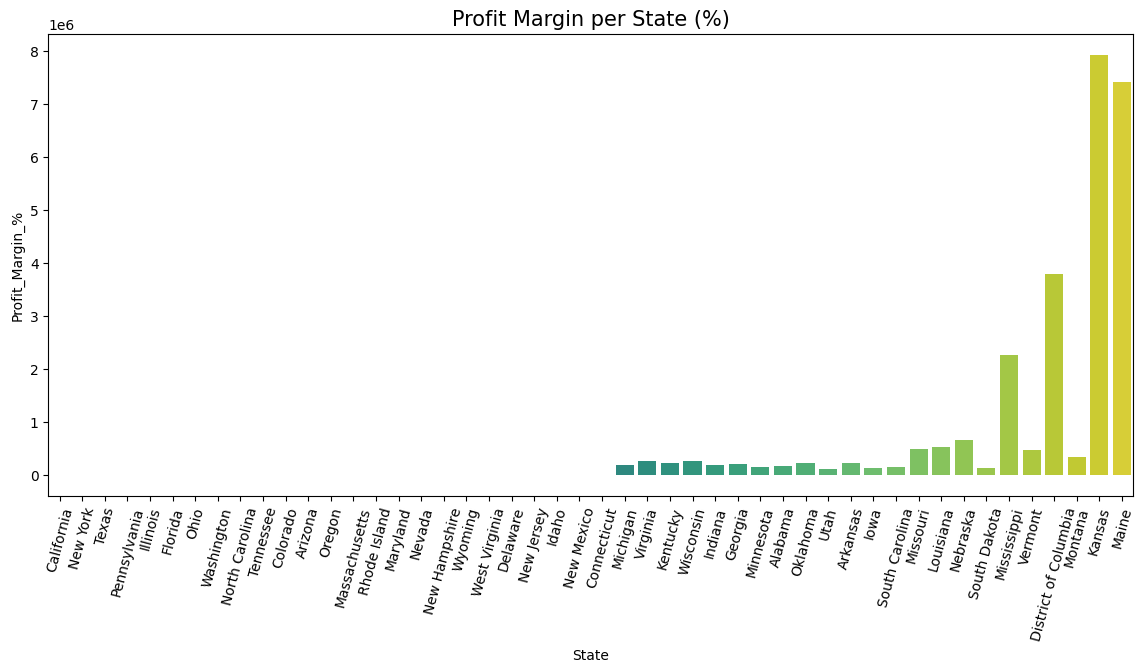

In [129]:
state_sales['Profit_Margin_%'] = (state_sales['Profit'] / state_sales['Sales']) * 100

plt.figure(figsize=(14, 6))
sns.barplot(x='State', y='Profit_Margin_%', data=state_sales, palette='viridis')
plt.title('Profit Margin per State (%)', fontsize=15)
plt.xticks(rotation=75)
plt.show()


In [130]:
# Check profit is not make sense
anomaly = state_sales[(state_sales['Sales'] == 0) & (state_sales['Profit'] != 0)]
if len(anomaly) > 0:
    print("⚠️ Anomali ditemukan:")
    print(anomaly)
else:
    print("✅ Data konsisten")

# Top 5 states
print("\nTop 5 States by Sales:")
print(state_sales[['State', 'Sales', 'Profit']].head())

✅ Data konsisten

Top 5 States by Sales:
           State         Sales        Profit
3     California  7.154192e+07  4.928346e+07
30      New York  3.902270e+07  1.822779e+07
40         Texas  3.555025e+07 -6.662844e+07
35  Pennsylvania  1.930910e+07 -4.796474e+07
11      Illinois  1.905220e+07 -5.310537e+07


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

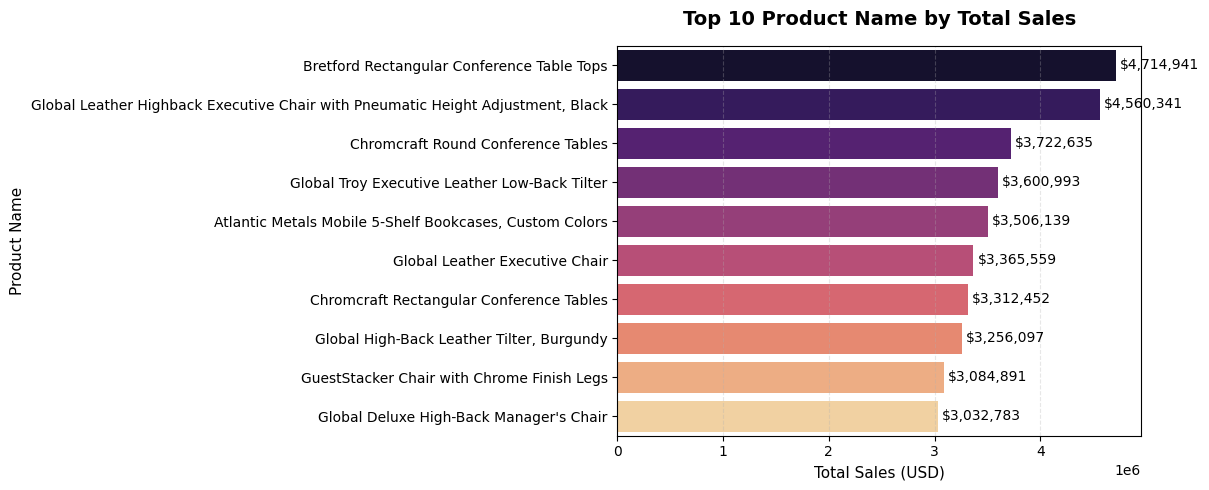

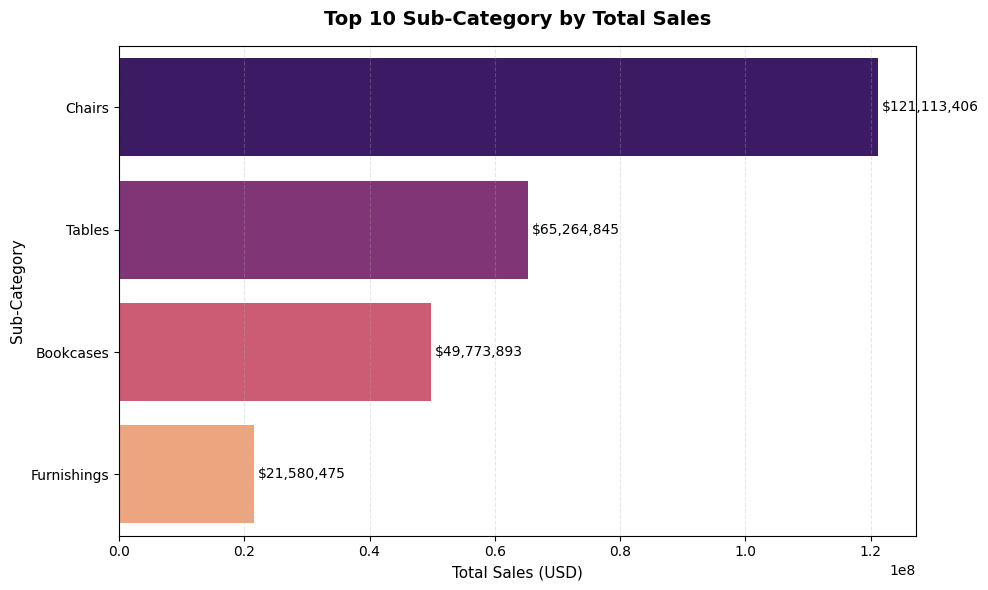

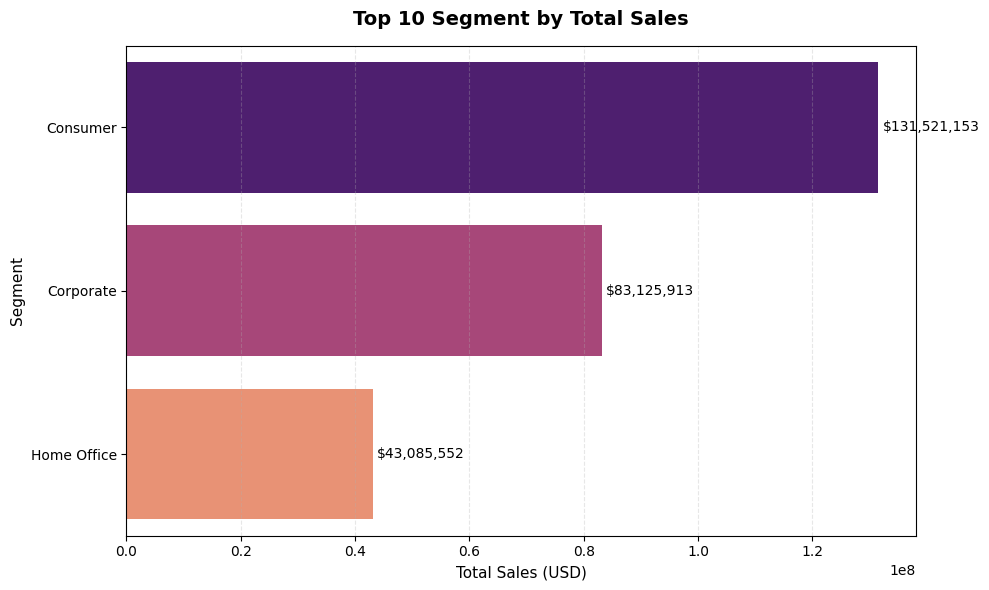

In [132]:
sales_columns = ['Product Name', 'Sub-Category', 'Segment']

# create a visualize function
def visualize_sales_by_columns(df, columns, top_n=10):
    for col in columns:
        summary = df.groupby(col)['Sales'].sum().sort_values(ascending=False).head(top_n).reset_index()

        # Determine optimal figure size based on column type
        if col == 'Product Name':
            figsize = (12, 5)
        else:
            figsize = (10, 6)

        # create visualization
        plt.figure(figsize=figsize)

        # Use horizontal bar for better readability (especially for long product names)
        ax = sns.barplot(
            y=col,
            x='Sales',
            data=summary,
            hue=col,
            palette='magma',
            legend=False
        )

        # add value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='${:,.0f}', padding=3)

        # plot
        plt.title(f"Top {top_n} {col} by Total Sales", fontsize=14, fontweight='bold', pad=15)
        plt.xlabel('Total Sales (USD)', fontsize=11)
        plt.ylabel(col, fontsize=11)
        plt.grid(axis='x', linestyle='--', alpha=0.3)

        # adjust layout to prevent label cutoff
        plt.tight_layout()
        plt.show()

visualize_sales_by_columns(df, sales_columns, top_n=10)

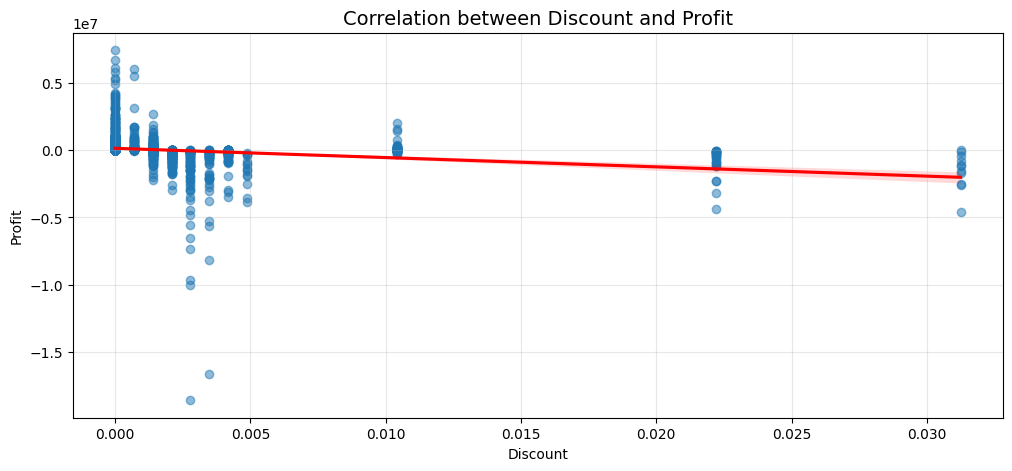

Correlation between Discount and Profit: -0.233
Insight: There are negatif correlation moderat to increase discount, profit will be decreased


In [133]:
# Discount correlation

def discount_profit_insight(df):
    plt.figure(figsize=(12, 5))

    # scatter plot with line regression
    sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

    plt.title('Correlation between Discount and Profit', fontsize=14, fontweight='regular')
    plt.xlabel('Discount')
    plt.ylabel('Profit')
    plt.grid(alpha=0.3)
    plt.show()

    # numeric correlation
    corr = df['Discount'].corr(df['Profit'])
    print(f"Correlation between Discount and Profit: {corr:.3f}")

    if corr < -0.5:
        print(f"Insight: High discount will decrease a profit significantly")
    elif -0.5 <= corr < 0.2:
        print(f"Insight: There are negatif correlation moderat to increase discount, profit will be decreased")
    else:
        print(f"Insight: Positive correlation, discount supports for increasing profit (affected by selling products)")

# visualize
discount_profit_insight(df)

Feature engineering data encoding

In [134]:
num_cols = ['Quantity', 'Discount'] # number columns
cat_cols = ['Sub-Category', 'Segment', 'Region'] # categorical columns

# Encoding categorical data
df_encoded = df.copy()
encoder = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Split and target data
X = df_encoded[['Quantity', 'Discount', 'Sub-Category', 'Segment', 'Region']]
y = df_encoded['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Machine learning modelling

In [135]:
# data modelling
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
print(results_df)

                     Model           MSE           RMSE  R2 Score
0  Random Forest Regressor  1.370331e+10  117061.158093  0.547698
1                  XGBoost  1.398009e+10  118237.427236  0.538563
2  Decision Tree Regressor  1.741262e+10  131956.901121  0.425266
3        Linear Regression  2.625950e+10  162047.820627  0.133260


Implementation model

In [136]:
# preprocessing data
df['Order Date' ] = pd.to_datetime(df['Order Date'])

# Classification sales per time period transforming order date to date
df_monthly = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
df_monthly.rename(columns={'Order Date': 'Date'}, inplace=True)

In [137]:
# Create time-based feature for random forest model
df_monthly['Lag_1'] = df_monthly['Sales'].shift(1)
df_monthly['Lag_2'] = df_monthly['Sales'].shift(2)
df_monthly['Rolling_Mean_3'] = df_monthly['Sales'].rolling(window=3).mean()
df_monthly = df_monthly.dropna()
df_monthly.tail()

,Date,Sales,Lag_1,Lag_2,Rolling_Mean_3
43,2017-08-31,7.275857e+06,6.523689e+06,7.222614e+06,7.007387e+06
44,2017-09-30,7.221901e+06,7.275857e+06,6.523689e+06,7.007149e+06
45,2017-10-31,8.440454e+06,7.221901e+06,7.275857e+06,7.646071e+06
46,2017-11-30,1.158190e+07,8.440454e+06,7.221901e+06,9.081418e+06
47,2017-12-31,6.872039e+06,1.158190e+07,8.440454e+06,8.964797e+06


In [138]:
# Random forest implementation

X = df_monthly[['Lag_1', 'Lag_2', 'Rolling_Mean_3']]
y = df_monthly['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score {r2_score(y_test, y_pred):.4f}")

RMSE: 2241583.21
R2 Score -0.4893


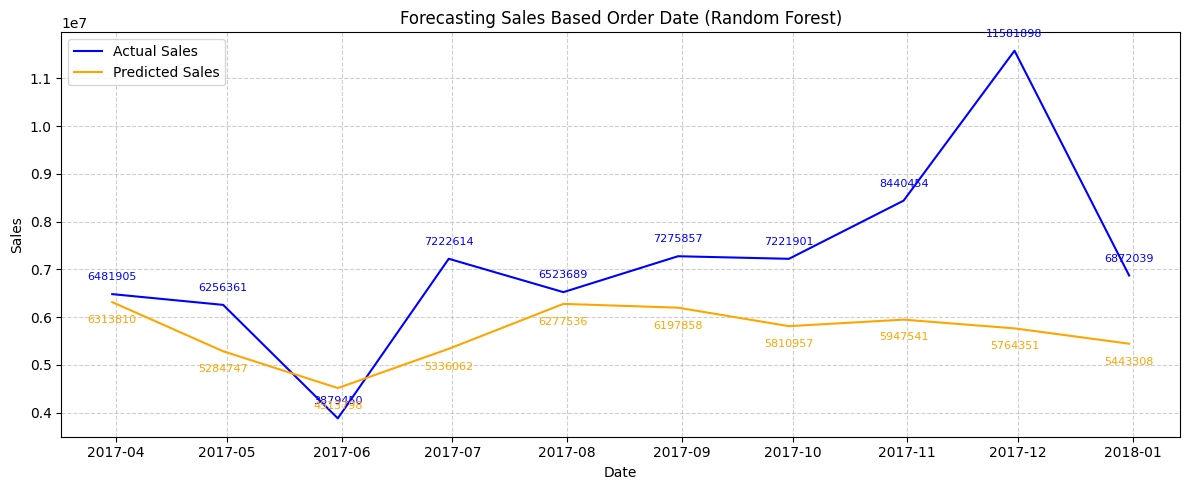

In [139]:
# Visualitation model
plt.figure(figsize=(12,5))
plt.plot(df_monthly['Date'].iloc[-len(y_test):], y_test.values, label='Actual Sales', color='blue')
plt.plot(df_monthly['Date'].iloc[-len(y_test):], y_pred, label='Predicted Sales', color='orange')

# add annotation for actual sales
for i, value in enumerate(y_test.values):
    plt.annotate(f'{value:.0f}',
                 (df_monthly['Date'].iloc[-len(y_test):].iloc[i], value),
                 textcoords='offset points',
                 xytext=(0, 10),
                 ha='center',
                 fontsize=8,
                 color='blue')

# add annotatation for forecast sales
for i, value in enumerate(y_pred):
    plt.annotate(f'{value:.0f}', 
                 (df_monthly['Date'].iloc[-len(y_test):].iloc[i], value), 
                 textcoords="offset points", 
                 xytext=(0,-15), 
                 ha='center', 
                 fontsize=8, 
                 color='orange')

plt.title('Forecasting Sales Based Order Date (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [140]:
# forecast data in the next month

latest_data = df_monthly.iloc[-1]
future_input = pd.DataFrame({
    'Lag_1': [latest_data['Sales']],
    'Lag_2': [df_monthly.iloc[-2]['Sales']],
    'Rolling_Mean_3': [df_monthly['Sales'].iloc[-3:].mean()]
})

future_forecast = model.predict(future_input)
print(f"prediction sales next month (2018-02): {future_forecast[0]:,.2f}")

prediction sales next month (2018-02): 5,663,030.74
